<a href="https://colab.research.google.com/github/OlegV12/Data-Analysis-Algorithms/blob/Lesson_7/Alg_Lesson7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris, load_wine
from sklearn import model_selection
import random
from matplotlib.colors import ListedColormap

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от номера соседа.

In [46]:
X, y = load_iris(return_X_y=True)

# Для наглядности возьмем только первые два признака (всего в датасете их 4)
X = X[:, :2]

In [47]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)

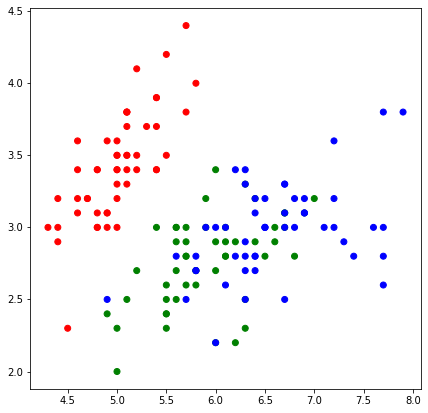

In [48]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)

In [49]:
def e_metrics(x1, x2):
    
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
      
    return np.sqrt(distance)

In [50]:
def knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for d in sorted(test_distances)[0:k]:
            classes[d[1]] += 1
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    
    return answers

In [51]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [52]:
def get_graph(X_train, y_train, k, knn):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    # Расчет пределов графика
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Получим предсказания для всех точек
    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    # Построим график
    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Добавим на график обучающую выборку
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [53]:
k = [1, 3, 5, 10]
no_weight_acc = []
for spam in k:
    y_pred = knn(X_train, y_train, X_test, spam)
    no_weight_acc.append(accuracy(y_pred, y_test))

In [54]:
no_weight_acc

[0.6666666666666666,
 0.7333333333333333,
 0.8666666666666667,
 0.8333333333333334]

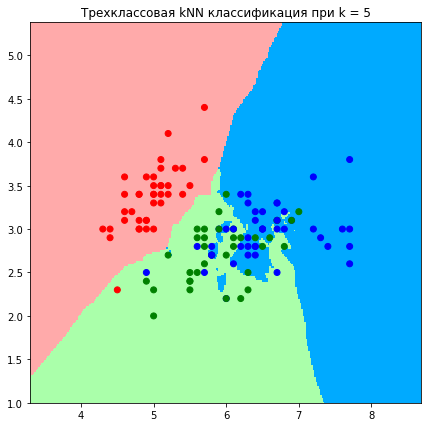

In [55]:
get_graph(X_train, y_train, 5, knn)

In [56]:
def weighted_num_knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 1 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for ind, d  in enumerate(sorted(test_distances)[0:k], start=1):

            classes[d[1]] += (1/ind)
            
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])

    return answers

In [57]:
k = [1, 3, 5, 10,]
weighted_num_acc = []
for spam in k:
    y_pred = weighted_num_knn(X_train, y_train, X_test, spam)
    weighted_num_acc.append(accuracy(y_pred, y_test))

In [58]:
weighted_num_acc

[0.6666666666666666,
 0.6666666666666666,
 0.7333333333333333,
 0.7666666666666667]

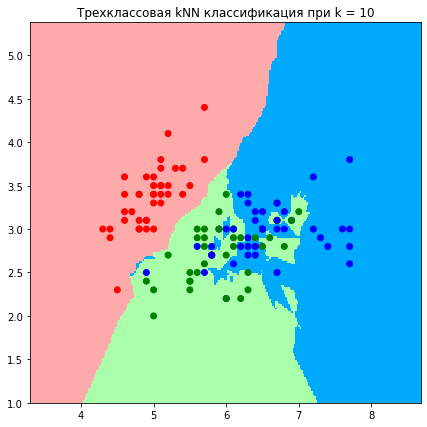

In [59]:
get_graph(X_train, y_train, 10, weighted_num_knn)

К алгоритму kNN, реализованному на уроке, реализовать добавление весов для соседей в зависимости от расстояния до соседа. Сравнить метрики качества и сложность разделяющей гиперплоскости. Сделать выводы.

In [60]:
def weighted_dist_knn(x_train, y_train, x_test, k):
    
    answers = []
    for x in x_test:
        test_distances = []
            
        for i in range(len(x_train)):
            
            # расчет расстояния от классифицируемого объекта до
            # объекта обучающей выборки
            distance = e_metrics(x, x_train[i])
            
            # Записываем в список значение расстояния и ответа на объекте обучающей выборки
            test_distances.append((distance, y_train[i]))
        
        # создаем словарь со всеми возможными классами
        classes = {class_item: 0 for class_item in set(y_train)}
        
        # Сортируем список и среди первых k элементов подсчитаем частоту появления разных классов
        for ind, d  in enumerate(sorted(test_distances)[0:k], start=1):

            classes[d[1]] += (0.9**d[0])
 
        # Записываем в список ответов наиболее часто встречающийся класс
        answers.append(sorted(classes, key=classes.get)[-1])
    
    return answers

In [61]:
k = [1, 3, 5, 10,]
weighted_dist_acc = []
for spam in k:
    y_pred = weighted_dist_knn(X_train, y_train, X_test, spam)
    weighted_dist_acc.append(accuracy(y_pred, y_test))

In [62]:
weighted_dist_acc

[0.6666666666666666,
 0.7333333333333333,
 0.8666666666666667,
 0.8666666666666667]

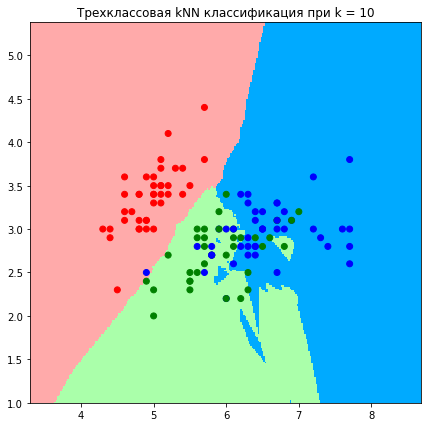

In [63]:
get_graph(X_train, y_train, 10, weighted_dist_knn)

Разделяющая гиперплоскость самая простая при реализации взвешивания растояний и при обычной реализации. 

In [64]:
# сравним показатели accuracy для разных реализаций
accuracy_list = np.array([no_weight_acc, weighted_num_acc, weighted_dist_acc])


In [65]:
accuracy_list.T

array([[0.66666667, 0.66666667, 0.66666667],
       [0.73333333, 0.66666667, 0.73333333],
       [0.86666667, 0.73333333, 0.86666667],
       [0.83333333, 0.76666667, 0.86666667]])

Если реалзация верна, то в целом взвешивание расстояний дает лучшие показатели accuracy.

Настроить оптимальное значение числа соседей для моделей из п.1 и п.2, сделать выводы. 

In [66]:
y_pred = weighted_num_knn(X_train, y_train, X_test, 8)
round(accuracy(y_pred, y_test), 2)

0.77

In [67]:
y_pred = weighted_dist_knn(X_train, y_train, X_test, 5)
round(accuracy(y_pred, y_test), 2)

0.87

Подобрав гиперпараметр k, можно достичь accuracy 0.87 при реализации взвешивания расстояний.  Хотел бы проверить так ли это на другом датасете. 

In [68]:
X, y = load_wine(return_X_y=True)

In [69]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

In [70]:
k = [1, 3, 5, 10]
no_weight_acc = []
for spam in k:
    y_pred = knn(X_train, y_train, X_test, spam)
    no_weight_acc.append(accuracy(y_pred, y_test))

In [71]:
no_weight_acc

[0.7407407407407407,
 0.7037037037037037,
 0.6666666666666666,
 0.7222222222222222]

In [72]:
k = [1, 3, 5, 10,]
weighted_num_acc = []
for spam in k:
    y_pred = weighted_num_knn(X_train, y_train, X_test, spam)
    weighted_num_acc.append(accuracy(y_pred, y_test))

In [73]:
weighted_num_acc

[0.7407407407407407,
 0.7407407407407407,
 0.7407407407407407,
 0.7222222222222222]

In [74]:
k = [1, 3, 5, 10,]
weighted_dist_acc = []
for spam in k:
    y_pred = weighted_dist_knn(X_train, y_train, X_test, spam)
    weighted_dist_acc.append(accuracy(y_pred, y_test))

In [75]:
weighted_dist_acc

[0.7407407407407407,
 0.8148148148148148,
 0.7592592592592593,
 0.6851851851851852]

In [76]:
# сравним показатели accuracy для разных реализаций
accuracy_list = np.array([no_weight_acc, weighted_num_acc, weighted_dist_acc])
accuracy_list.T

array([[0.74074074, 0.74074074, 0.74074074],
       [0.7037037 , 0.74074074, 0.81481481],
       [0.66666667, 0.74074074, 0.75925926],
       [0.72222222, 0.72222222, 0.68518519]])

Здесь лучше видно, что в целом взвешивание номеров лучше реализации без весов, но хуже реализации со взвешиванием расстояний. (Опять же, если я правильно выполнил задание).  

Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутриклассовое расстояние и построить график ее зависимости от количества кластеров k (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [77]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=100, random_state=1)

Изобразим точки на графике.

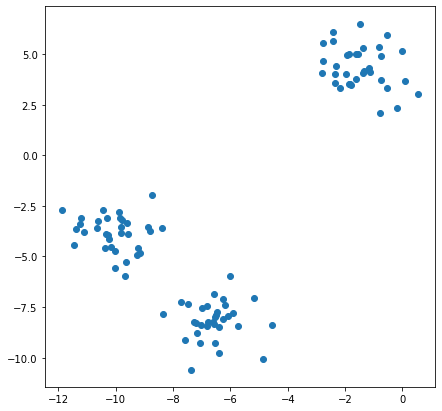

In [78]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [79]:
def kmeans(data, k, max_iterations, min_distance):
    # Создадим словарь для классификации
    classes = {i: [] for i in range(k)}
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [80]:
def my_metric(centroids, clusters):
    err_list = []
    for ind, centroid in enumerate(centroids):
        err = 0
        for itm in clusters[ind]:
            err += (sum((itm - centroid)**2))**0.5
        err_list.append(err/len(clusters[ind]))

    return sum(err_list)/len(err_list)

In [81]:
min_distance = 1e-4
max_iterations = np.arange(1, 11)
k = 3
error = []
for ind, itm in enumerate(max_iterations):
    centroids, clusters = kmeans(X, k, itm, min_distance)
    error.append(my_metric(centroids, clusters))

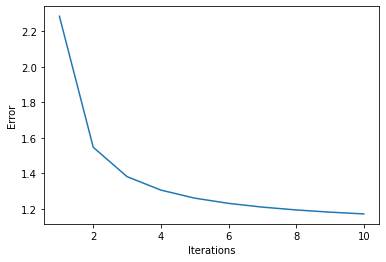

In [82]:
plt.plot(max_iterations, error)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()